In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from cosmojo.universe import *
# import seaborn as sns
from cosmojo.utils import *
from cosmojo.kernels import LensCMB, GalsTomo
from cosmojo.limber import Limber
from cosmojo.survey import dNdzMagLim, dNdzInterpolation

from scipy.interpolate import interp1d

from TWOmpz_utils import Load2MPZ

%load_ext line_profiler


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [42]:
def SetPlotStyle():
   rc('text',usetex=True)
   rc('font',**{'family':'serif','serif':['Computer Modern']})
   plt.rcParams['axes.linewidth']  = 1.5
   plt.rcParams['axes.labelsize']  = 28
   plt.rcParams['axes.titlesize']  = 22
   plt.rcParams['xtick.labelsize'] = 20
   plt.rcParams['ytick.labelsize'] = 18
   plt.rcParams['xtick.major.size'] = 7
   plt.rcParams['ytick.major.size'] = 7
   plt.rcParams['xtick.minor.size'] = 3
   plt.rcParams['ytick.minor.size'] = 3
   plt.rcParams['legend.fontsize']  = 10
   plt.rcParams['legend.frameon']  = False

   plt.rcParams['xtick.major.width'] = 1
   plt.rcParams['ytick.major.width'] = 1
   plt.rcParams['xtick.minor.width'] = 1
   plt.rcParams['ytick.minor.width'] = 1
   # plt.clf()
   # sns.set(rc('font',**{'family':'serif','serif':['Computer Modern']}))
   # sns.set_style("ticks", {'figure.facecolor': 'grey'})

SetPlotStyle()

In [43]:
cosmo = Cosmo(nonlinear=True)

In [44]:
nlkk_s4 = np.loadtxt('/Users/fbianchini/Softwares/lensingbiases/nlkk_cmb_s4_1muK_2fwhm_lmax3000T_lmax5000P_lmin30.dat')
nlkk_SO = np.loadtxt('/Users/fbianchini/Softwares/lensingbiases/nlkk_cmb_SO_1muK_1.4fwhm_lmax3000T_lmax5000P_lmin30.dat')
nlkk_s4 = interp1d(nlkk_s4[:,0], nlkk_s4[:,1], bounds_error=0, fill_value='extrapolate', kind='cubic')
nlkk_SO = interp1d(nlkk_SO[:,0], nlkk_SO[:,1], bounds_error=0, fill_value='extrapolate', kind='cubic')

In [45]:
nlkk_planck = np.loadtxt('/Users/fbianchini/Research/CosMojo/data/nlkk_planck2015.dat', unpack=1,usecols=1)


In [46]:
clkk = cosmo.cmb_spectra(3000)[:,4]

Text(0,0.5,u'$C_{\\ell}^{\\kappa\\kappa}$')

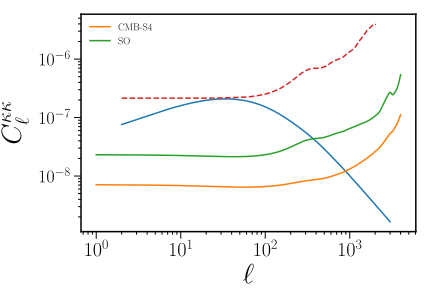

In [80]:
ell = np.arange(4000)
plt.loglog(clkk)
# plt.loglog(nlkk_s4[:,0],nlkk_s4[:,1],label='')
plt.loglog(ell, nlkk_s4(ell),label='CMB-S4')
plt.loglog(ell, nlkk_SO(ell),label='SO')
plt.loglog(nlkk_planck,ls='--')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\kappa\kappa}$')

In [48]:
def GetErrDg(clkg_data, clgg_data, clkg_th, clgg_th, kgerr, ggerr):
    sigma2_dg_l = np.abs(clgg_th/(clgg_data*clkg_th**2)) * (kgerr**2 + 0.25*clkg_data**2*ggerr**2/clgg_data**2)
    return np.sqrt(np.sum(sigma2_dg_l))/len(sigma2_dg_l)

# def GetErrDg2(clkg_fid, clgg_fid, kgerr, ggerr):
#     return np.sqrt((kgerr/clkg_fid)**2 + (ggerr/clgg_fid)**2)
def GetErrDg2(clkg_data, clgg_data, clkg_th, clgg_th, kgerr, ggerr):
    return np.abs(clgg_th/(clgg_data*clkg_th**2)) * (kgerr**2 + 0.25*clkg_data**2*ggerr**2/clgg_data**2)


In [10]:
i = 25
z0 = 0.0417*i - 0.744
dndz = dNdzMagLim(2, z0, 1, nbins=9, z_max=zbins[-1], sigma_zph=0.01)
dndz2 = dNdzMagLim(2, z0, 1, bins=zbins, z_max=zbins[-1], sigma_zph=0.03)

202.416945793
70.7604842777
72.1849491238
105.340174646
183.192474134
353.48380834
730.619369933
1585.69084806
3677.39865845
3546.33463118
717.362675659
322.551712939
205.435981737
159.639871878
142.422168141
141.712210561
154.960836498
184.850540486
239.817707764
338.296429567
519.78544225
872.724683404
1608.59327721
3530.16681349


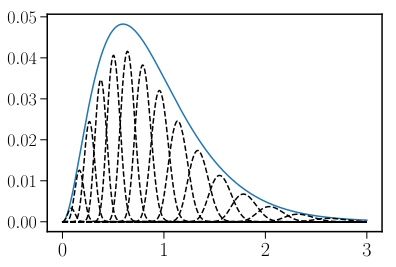

In [11]:
z = np.linspace(0,3,1000)
plt.plot(z,dndz2.raw_dndz(z))
for i in xrange(dndz2.nbins):
#     plt.plot(z,dndz.raw_dndz_bin(z,i), color='grey')
    plt.plot(z, dndz2.raw_dndz_bin(z,i),'k--')


In [49]:
cosmo.k_NL(0.08)*cosmo.f_K(0.08)

54.461166809706718

In [14]:
cosmo.k_NL(0.08)*cosmo.d_A(0.08)

50.133953797790369

In [22]:
(0.05)/(2-0.05)

0.025641025641025644

In [50]:
def GetZmax(sigma_z, zmin):
    return (2*zmin+6*sigma_z+3*sigma_z*zmin)/(2-3*sigma_z)

In [51]:
zmin = 0.
zbins = []
zbins.append(zmin)
for i in xrange(15):
    zmax = GetZmax(0.03,zmin)
    print zmax#-zmin
    zbins.append(zmax)
    zmin = zmax

0.0942408376963
0.197363010882
0.310203504055
0.433678179829
0.568789212483
0.716633222037
0.878410174899
1.05543312332
1.24913886269
1.4610995932
1.69303568052
1.946829619
2.22454131084
2.52842478516
2.86094649267


In [21]:
1./dndz2.norm_bin, 1./dndz2.norm

(array([ 0.00028198,  0.001394  ,  0.00310028,  0.0048677 ,  0.0062641 ,
         0.00702138,  0.00705655,  0.00645324,  0.00540978,  0.00416983,
         0.00295599,  0.00192387,  0.00114584,  0.00062166,  0.00028327]),
 0.05298723435536999)

In [52]:
ngal = 40 / 8.461594994075239e-8 # gal/sr

In [53]:
ngal * (18000./42000)

202596049.0292962

In [54]:
limb = Limber(cosmo,lmax=3000)
limb_z0 = Limber(cosmo,lmax=3000, compute_at_z0=1)

In [55]:
gals = GalsTomo(cosmo, dndz2, b=lambda z: 1+z)


In [56]:
lcmb = LensCMB(cosmo)

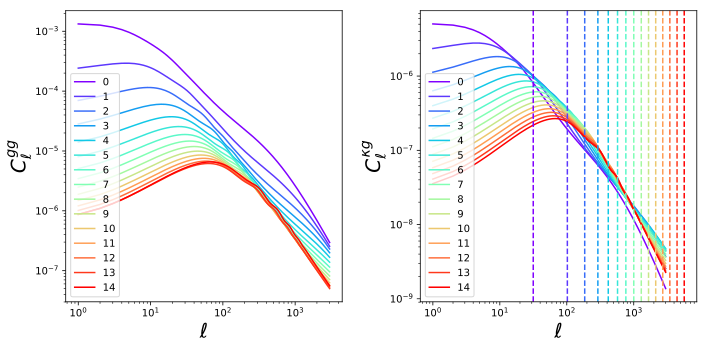

In [544]:
jet= plt.get_cmap('rainbow')
colors = iter(jet(np.linspace(0,1,dndz2.nbins)))

plt.figure(figsize=(10,5))

plt.subplot(121)
for i in xrange(dndz2.nbins):
    plt.loglog(limb.GetCl(gals,i=i,j=i), label='%d'%i, color=next(colors))
plt.legend()
plt.xlabel(r'$\ell$', size=20)
plt.ylabel(r'$C_{\ell}^{gg}$', size=20)

jet= plt.get_cmap('rainbow')
colors = iter(jet(np.linspace(0,1,dndz2.nbins)))

plt.subplot(122)
for i in xrange(dndz2.nbins):
    plt.loglog(limb.GetCl(lcmb,k2=gals,j=i), label='%d'%i,  color=next(colors))
plt.xlabel(r'$\ell$', size=20)
plt.ylabel(r'$C_{\ell}^{\kappa g}$', size=20)

jet= plt.get_cmap('rainbow')
colors = iter(jet(np.linspace(0,1,dndz2.nbins)))

for i in xrange(dndz2.nbins):
    _z_ = (gals.tomo.bounds[i][0]+gals.tomo.bounds[i][1])/2.
    plt.axvline(cosmo.k_NL(_z_)*cosmo.f_K(_z_), ls='--', color=next(colors))

plt.legend(loc='best')

plt.tight_layout()
# plt.xlim(10)

In [62]:
fsky = 18000./42000
dg_err = []
dg = []
zs = []
lmin = 10
for i in xrange(dndz2.nbins):
    _z_ = (gals.tomo.bounds[i][0]+gals.tomo.bounds[i][1])/2.
    lmax = int(cosmo.k_NL(_z_)*cosmo.f_K(_z_))
    if lmax >= 3000:
        lmax=2999
    print lmax
#     lmax = 100
  
    l = np.arange(lmin,lmax+1)
    ng = norm[i]*ngal_tot/norm_tot#ngal *
    print ng
    
    clgg = limb.GetCl(gals,i=i,j=i)
    clkg = limb.GetCl(lcmb,k2=gals,j=i)
    
    clgg_z0 = limb_z0.GetCl(gals,i=i,j=i)
    clkg_z0 = limb_z0.GetCl(lcmb,k2=gals,j=i)
    
    sigma_gg = np.sqrt(2./((2*l[:lmax-lmin+1]+1)*fsky)) * (clgg[:lmax-lmin+1] + 1./ng)
    sigma_kg = np.sqrt(1./((2*l[:lmax-lmin+1]+1)*fsky)  * (clkg[:lmax-lmin+1]**2 + (clkk[:lmax-lmin+1]+nlkk_s4(l))*(clgg[:lmax-lmin+1]+1./ng)))

    dg_err.append(GetErrDg(clkg[:lmax-lmin+1], clgg[:lmax-lmin+1], clkg_z0[:lmax-lmin+1], clgg_z0[:lmax-lmin+1], sigma_kg, sigma_gg))
#     dg_err.append(GetErrDg2(clkg[:lmax-1],clgg[:lmax-1], sigma_kg, sigma_gg)*cosmo.D_z_norm(_z_))
    dg.append(cosmo.D_z_norm(_z_))
    zs.append(_z_)
    
#     print np.mean(clkg[:lmax-lmin+1]/clkg_z0[:lmax-lmin+1]*np.sqrt(clgg_z0[:lmax-lmin+1]/clgg[:lmax-lmin+1]))
#     print dg[-1]

31
2964402.77117
101
14654740.9907
185
32592492.2624
291
51172945.0668
416
65852998.28
573
73814100.3288
762
74183898.2437
1001
67841426.5549
1295
56871698.5113
1663
43836480.2425
2128
31075599.0586
2713
20225199.3874
2999
12045911.3946
2999
6535377.43635
2999
2977979.44506


In [63]:
fsky = 18000./42000
dg_SO_err = []
dg_SO = []
zs_SO = []
lmin = 10
for i in xrange(dndz2.nbins):
    _z_ = (gals.tomo.bounds[i][0]+gals.tomo.bounds[i][1])/2.
    lmax = int(cosmo.k_NL(_z_)*cosmo.f_K(_z_))
    if lmax >= 3000:
        lmax=2999
    print lmax
#     lmax = 100
  
    l = np.arange(lmin,lmax+1)
    ng = norm[i]*ngal_tot/norm_tot#ngal *
    print ng
    
    clgg = limb.GetCl(gals,i=i,j=i)
    clkg = limb.GetCl(lcmb,k2=gals,j=i)
    
    clgg_z0 = limb_z0.GetCl(gals,i=i,j=i)
    clkg_z0 = limb_z0.GetCl(lcmb,k2=gals,j=i)
    
    sigma_gg = np.sqrt(2./((2*l[:lmax-lmin+1]+1)*fsky)) * (clgg[:lmax-lmin+1] + 1./ng)
    sigma_kg = np.sqrt(1./((2*l[:lmax-lmin+1]+1)*fsky)  * (clkg[:lmax-lmin+1]**2 + (clkk[:lmax-lmin+1]+nlkk_SO(l))*(clgg[:lmax-lmin+1]+1./ng)))
    
    dg_SO_err.append(GetErrDg(clkg[:lmax-lmin+1], clgg[:lmax-lmin+1], clkg_z0[:lmax-lmin+1], clgg_z0[:lmax-lmin+1], sigma_kg, sigma_gg))
#     dg_err.append(GetErrDg2(clkg[:lmax-1],clgg[:lmax-1], sigma_kg, sigma_gg)*cosmo.D_z_norm(_z_))
    dg_SO.append(cosmo.D_z_norm(_z_))
    zs_SO.append(_z_)
    
#     print np.mean(clkg[:lmax-lmin+1]/clkg_z0[:lmax-lmin+1]*np.sqrt(clgg_z0[:lmax-lmin+1]/clgg[:lmax-lmin+1]))
#     print dg[-1]

31
2964402.77117
101
14654740.9907
185
32592492.2624
291
51172945.0668
416
65852998.28
573
73814100.3288
762
74183898.2437
1001
67841426.5549
1295
56871698.5113
1663
43836480.2425
2128
31075599.0586
2713
20225199.3874
2999
12045911.3946
2999
6535377.43635
2999
2977979.44506


In [64]:
fsky = 18000./42000
dg_err_planck = []
dg_planck = []
zs_planck = []
lmin = 10
for i in xrange(dndz2.nbins):
    _z_ = (gals.tomo.bounds[i][0]+gals.tomo.bounds[i][1])/2.
    lmax = int(cosmo.k_NL(_z_)*cosmo.f_K(_z_))
    if lmax >= len(nlkk_planck):
        lmax=len(nlkk_planck)
    print lmax
#     lmax = 100
  
    l = np.arange(lmin,lmax+1)
    ng = norm[i]*ngal_tot/norm_tot#ngal *
    
    clgg = limb.GetCl(gals,i=i,j=i)
    clkg = limb.GetCl(lcmb,k2=gals,j=i)
    
    clgg_z0 = limb_z0.GetCl(gals,i=i,j=i)
    clkg_z0 = limb_z0.GetCl(lcmb,k2=gals,j=i)
    
    sigma_gg = np.sqrt(2./((2*l[:lmax-lmin+1]+1)*fsky)) * (clgg[:lmax-lmin+1] + 1./ng)
    sigma_kg = np.sqrt(1./((2*l[:lmax-lmin+1]+1)*fsky)  * (clkg[:lmax-lmin+1]**2 + (clkk[:lmax-lmin+1]+nlkk_planck[:lmax-lmin+1])*(clgg[:lmax-lmin+1]+1./ng)))
    
    dg_err_planck.append(GetErrDg(clkg[:lmax-lmin+1], clgg[:lmax-lmin+1], clkg_z0[:lmax-lmin+1], clgg_z0[:lmax-lmin+1], sigma_kg, sigma_gg))
#     dg_err.append(GetErrDg2(clkg[:lmax-1],clgg[:lmax-1], sigma_kg, sigma_gg)*cosmo.D_z_norm(_z_))
    dg_planck.append(cosmo.D_z_norm(_z_))
    zs_planck.append(_z_)

31
101
185
291
416
573
762
1001
1295
1663
2049
2049
2049
2049
2049


In [57]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset, zoomed_inset_axes)


/Users/fbianchini/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


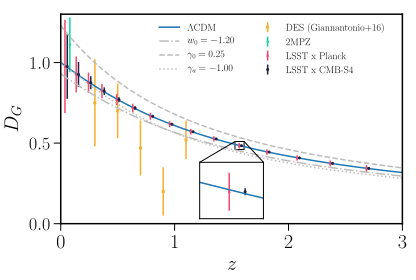

In [612]:
myz = np.linspace(0,3)

fig, ax1 = plt.subplots()

ax1.plot(myz, cosmo.D_z_norm(myz), label=r'$\Lambda$CDM')
ax1.plot(z_, dw, '-.', label=r'$w_0=%.2f$'%w, color='#BEBBBB')
ax1.plot(z_, dgamma0, '--', label=r'$\gamma_0=%.2f$'%gamma0, color='#BEBBBB')
ax1.plot(z_, dgammaa, ':', label=r'$\gamma_a=%.2f$'%gammaa, color='#BEBBBB')
ax1.errorbar(des_z, des_DG, yerr=des_DG_errs, label='DES (Giannantonio+16)', ms=2, color='#F6AE2D', fmt='s')
ax1.errorbar(0.08, 1.11, yerr=0.17, label='2MPZ', color='#06D6A0', fmt='*', ms=2)
ax1.errorbar(np.asarray(zs_planck)-0.01, dg_planck, yerr=dg_err_planck, color='#EF476F', fmt='x', ms=2, label='LSST x Planck')
ax1.errorbar(np.asarray(zs)+0.01, dg, yerr=dg_err, color='#1F2041', fmt='o', ms=2, label='LSST x CMB-S4')

ax1.set_xlabel(r'$z$',size=20)
ax1.set_ylabel(r'$D_G$',size=20)
ax1.legend(loc='best', ncol=2)
ax1.set_xlim(0,3)
ax1.set_ylim(0.0,1.3)

# ax2 = plt.axes([1.4,1.6,0.45,0.55])
# ip = InsetPosition(ax1, [0.4,0.2,0.5,0.5])
# ax2.set_axes_locator(ip)
# mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

ax2 = zoomed_inset_axes(ax1, 7.,loc='lower center')

ax2.plot(myz, cosmo.D_z_norm(myz), label=r'$\Lambda$CDM')
ax2.errorbar(np.asarray(zs_planck)-0.01, dg_planck, yerr=dg_err_planck, color='#EF476F', fmt='x', ms=2, label='LSST x Planck')
ax2.errorbar(np.asarray(zs)+0.01, dg, yerr=dg_err, color='#1F2041', fmt='o', ms=2, label='LSST x CMB-S4')
ax2.set_xlim(1.53, 1.61)
ax2.set_ylim(.46, .51)
# ax2.xticks([])
# ax2.yticks([])
plt.yticks(visible=False)
plt.xticks(visible=False)
ax2.yaxis.set_ticks_position("none")
ax2.xaxis.set_ticks_position("none")
[a.set_linewidth(1.0) for a in ax2.spines.itervalues()]

box, c1, c2 = mark_inset(ax1, ax2, loc1=2, loc2=1, fc="none", ec="0.5", lw=1)

box.set_linewidth(1)
plt.setp([c1,c2], linestyle="-", color='k')
plt.setp(box, color='k')

plt.tight_layout()
plt.savefig('D_G_forecast.pdf')

In [58]:
des_z       = [0.3,0.5,0.7,0.9,1.1]
des_DG      = [0.75,0.70,0.47,0.20,0.52]
des_DG_errs = [0.27,0.17,0.17,0.15,0.12]


In [34]:
dg_err_planck

[0.29075895434173665,
 0.11249531442439518,
 0.064081566157524181,
 0.044772621128680717,
 0.034491295750405174,
 0.027085245368690263,
 0.022407686544501513,
 0.019204542221823787,
 0.017344382164542829,
 0.016990963833570519,
 0.017168974775499807,
 0.016720745333567204,
 0.016909863561982992,
 0.018096584648548918,
 0.021793369262654662]

In [82]:
np.sqrt(np.sum(np.asarray(dg_planck)**2/np.asarray(dg_err_planck)**2))

92.304790983564999

In [84]:
np.sqrt(np.sum(np.asarray(dg)**2/np.asarray(dg_err)**2))

467.66335242025031

In [83]:
np.sqrt(np.sum(np.asarray(dg_SO)**2/np.asarray(dg_SO_err)**2))

311.69637183314438

In [23]:
norm = 1./dndz2.norm_bin

In [60]:
norm

array([ 0.00028198,  0.001394  ,  0.00310028,  0.0048677 ,  0.0062641 ,
        0.00702138,  0.00705655,  0.00645324,  0.00540978,  0.00416983,
        0.00295599,  0.00192387,  0.00114584,  0.00062166,  0.00028327])

In [61]:
ngal_tot = 3e9/(4*np.pi*fsky)

In [26]:
norm_tot = 1./dndz2.norm

In [27]:
norm_tot

0.05298723435536999

In [28]:
norm*ngal_tot/norm_tot

array([  2964402.77117467,  14654740.99070898,  32592492.262425  ,
        51172945.06678867,  65852998.28000011,  73814100.32884258,
        74183898.24372824,  67841426.55485415,  56871698.51131934,
        43836480.24245636,  31075599.05860658,  20225199.38739759,
        12045911.39461411,   6535377.43635494,   2977979.445056  ])

In [29]:
ngal_tot

557042300.8216337

In [30]:
2e9/64800000.00000001

30.864197530864192

In [364]:
40*10**(0.31*(25.3-25))*64800000

3210960752.286719

In [343]:
cosmo_lin = Cosmo()

In [344]:
cosmo_lin.k_NL(0.08)*cosmo_lin.f_K(0.08)

66.936050679598395

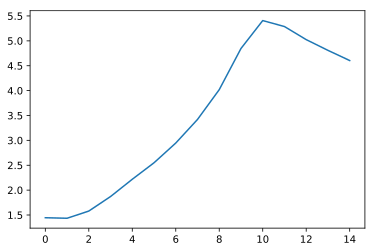

In [561]:
plt.plot(np.asarray(dg_err_planck)/np.asarray(dg_err))
# plt.plot(dg_err)


In [85]:
# Load Cat 
print("...loading 2MPZ catalogue...")
twoMPZ_cat = 'fits/results16_23_12_14_73.fits'
twompz = Load2MPZ(twoMPZ_cat, K_S_min=0, K_S_max=13.9)
print("...done...")


...loading 2MPZ catalogue...
...done...


In [86]:
from astropy.visualization import hist
# 2MPZ dN/dz
nz, zmpz, _ = hist(twompz.ZPHOTO,'knuth', normed=1, histtype='step')
zmpz = 0.5 * (zmpz[1:]+zmpz[:-1])
plt.close()


In [87]:
DNDZ = dNdzInterpolation(zmpz, nz, bins=[0.,0.24], sigma_zph=0.015, z_min=0, z_max=1)

1.01507876116


In [88]:
gals_2mpz = GalsTomo(cosmo, DNDZ, b=1.2, alpha=1)


In [89]:
lmin=10; lmax=100
l = np.arange(lmin,lmax+1)
ng = 1e4#norm[i]*ngal_tot/norm_tot#ngal *

clgg_2mpz = limb.GetCl(gals_2mpz,i=0,j=0)
clkg_2mpz = limb.GetCl(lcmb,k2=gals_2mpz,j=0)

clgg_z0_2mpz = limb_z0.GetCl(gals_2mpz,i=0,j=0)
clkg_z0_2mpz = limb_z0.GetCl(lcmb,k2=gals_2mpz,j=0)

sigma_gg_2mpz = np.sqrt(2./((2*l[:lmax-lmin+1]+1)*fsky)) * (clgg_2mpz[:lmax-lmin+1] + 1./81000.)
sigma_kg_2mpz = np.sqrt(1./((2*l[:lmax-lmin+1]+1)*fsky)  * (clkg_2mpz[:lmax-lmin+1]**2 + (clkk[:lmax-lmin+1]+nlkk_planck[:lmax-lmin+1])*(clgg_2mpz[:lmax-lmin+1]+1./81000.)))

print GetErrDg(clkg_2mpz[:lmax-lmin+1], clgg_2mpz[:lmax-lmin+1], clkg_z0_2mpz[:lmax-lmin+1], clgg_z0_2mpz[:lmax-lmin+1], sigma_kg_2mpz, sigma_gg_2mpz)


0.205768448412


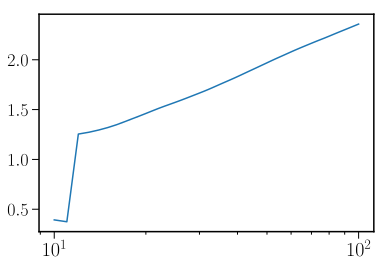

In [90]:
plt.semilogx(l[:lmax-lmin+1], GetErrDg2(clkg_2mpz[:lmax-lmin+1], clgg_2mpz[:lmax-lmin+1], clkg_z0_2mpz[:lmax-lmin+1], clgg_z0_2mpz[:lmax-lmin+1], sigma_kg_2mpz, sigma_gg_2mpz)**0.5)

In [91]:
np.sqrt(np.sum(clgg_2mpz[2:lmax-lmin+1]**2/sigma_gg_2mpz[2:]**2))

41.771082196213385

In [615]:
67836930.8071*(4*np.pi*18000./42000)/1e6

365.3417202268534

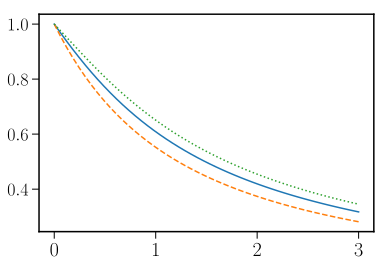

In [619]:
plt.plot(myz, cosmo.D_z_norm(myz), label=r'$\Lambda$CDM')
plt.plot(myz, cosmo.D_z_norm(myz, gamma0=0.25),'--',)# label=r'$\Lambda$CDM')
plt.plot(myz, cosmo.D_z_norm(myz, gamma0=0.80),':',)# label=r'$\Lambda$CDM')


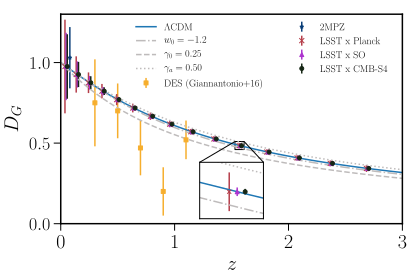

In [76]:
myz = np.linspace(0,3)

cosmo_w = Cosmo({'w':-1.2})

fig, ax1 = plt.subplots()#figsize=(8,6))

ax1.plot(myz, cosmo.D_z_norm(myz), label=r'$\Lambda$CDM')
ax1.plot(myz, cosmo_w.D_z_norm(myz), '-.', label=r'$w_0=-1.2$', color='#BEBBBB')
ax1.plot(myz, cosmo.D_z_norm(myz, gamma0=0.25), '--', label=r'$\gamma_0=0.25$', color='#BEBBBB')
ax1.plot(myz, cosmo.D_z_norm(myz, gammaa=0.5), ':', label=r'$\gamma_a=0.50$', color='#BEBBBB')
ax1.errorbar(des_z, des_DG, yerr=des_DG_errs, label='DES (Giannantonio+16)', ms=4, color='#F6AE2D', fmt='s')
ax1.errorbar(0.08, 1.03, yerr=0.19, label='2MPZ', color='#083D77', fmt='*', ms=4)
ax1.errorbar(np.asarray(zs_planck)-0.01, dg_planck, yerr=dg_err_planck, color='#B53D49', fmt='x', ms=5, label='LSST x Planck')
ax1.errorbar(np.asarray(zs_SO), dg_SO, yerr=dg_SO_err, color='#AC33CE', fmt='^', ms=4, label='LSST x SO')
ax1.errorbar(np.asarray(zs)+0.01, dg, yerr=dg_err, color='#152614', fmt='o', ms=4, label='LSST x CMB-S4')

ax1.set_xlabel(r'$z$',size=20)
ax1.set_ylabel(r'$D_G$',size=20)
ax1.legend(loc='best', ncol=2)
ax1.set_xlim(0,3)
ax1.set_ylim(0.0,1.3)

# ax2 = plt.axes([1.4,1.6,0.45,0.55])
# ip = InsetPosition(ax1, [0.4,0.2,0.5,0.5])
# ax2.set_axes_locator(ip)
# mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

ax2 = zoomed_inset_axes(ax1, 7.,loc='lower center')

ax2.plot(myz, cosmo.D_z_norm(myz), label=r'$\Lambda$CDM')
ax2.plot(myz, cosmo_w.D_z_norm(myz), '-.', label=r'$w_0=-1.2$', color='#BEBBBB')
ax2.plot(myz, cosmo.D_z_norm(myz, gamma0=0.25), '--', label=r'$\gamma_0=0.25$', color='#BEBBBB')
ax2.plot(myz, cosmo.D_z_norm(myz, gammaa=0.5), ':', label=r'$\gamma_a=0.50$', color='#BEBBBB')
ax2.errorbar(np.asarray(zs_planck)-0.01, dg_planck, yerr=dg_err_planck, color='#B53D49', fmt='x', ms=4, label='LSST x Planck')
ax2.errorbar(np.asarray(zs_SO), dg_SO, yerr=dg_SO_err, color='#AC33CE', fmt='^', ms=4, label='LSST x SO')
ax2.errorbar(np.asarray(zs)+0.01, dg, yerr=dg_err, color='#152614', fmt='o', ms=4, label='LSST x CMB-S4')
ax2.set_xlim(1.53, 1.61)
ax2.set_ylim(.46, .51)
# ax2.xticks([])
# ax2.yticks([])
plt.yticks(visible=False)
plt.xticks(visible=False)
ax2.yaxis.set_ticks_position("none")
ax2.xaxis.set_ticks_position("none")
[a.set_linewidth(1.0) for a in ax2.spines.itervalues()]

box, c1, c2 = mark_inset(ax1, ax2, loc1=2, loc2=1, fc="none", ec="0.5", lw=1)

box.set_linewidth(1) 
plt.setp([c1,c2], linestyle="-", color='k')
plt.setp(box, color='k')

plt.tight_layout()
plt.savefig('D_G_forecast2.pdf')

In [622]:
np.sqrt(0.17**2+0.03**2)

0.17262676501632071

In [638]:
limb_lin = Limber(cosmo_lin)

In [651]:
limb_z0_lin = Limber(cosmo_lin, compute_at_z0=1,lmax=3000)

In [650]:
limb_z0_lin.lmax

2000

In [79]:
np.sqrt(np.sum(((cosmo.D_z_norm(zs, gammaa=0.5)-np.asarray(dg_planck))/np.asarray(dg_SO_err))**2))

13.442292946445667

In [101]:
np.sqrt(np.sum(((cosmo.D_z_norm(zs, gamma0=0.25)-np.asarray(dg))/np.asarray(dg_err))**2))

48.287980255913396

In [106]:
np.sqrt(np.sum(((cosmo_w.D_z_norm(zs)-np.asarray(dg))/np.asarray(dg_err_planck))**2))

2.1424379163245515

In [108]:
468./92., 312./92 

(5.086956521739131, 3.391304347826087)

In [92]:
GetErrDg(clkg_2mpz[:lmax-lmin+1], clgg_2mpz[:lmax-lmin+1], clkg_z0_2mpz[:lmax-lmin+1], clgg_z0_2mpz[:lmax-lmin+1], sigma_kg_2mpz, sigma_gg_2mpz)

0.20576844841151537

4.6591487571112786

In [94]:
np.sqrt(((cosmo.D_z_norm(0.08))/GetErrDg(clkg_2mpz[:lmax-lmin+1], clgg_2mpz[:lmax-lmin+1], clkg_z0_2mpz[:lmax-lmin+1], clgg_z0_2mpz[:lmax-lmin+1], sigma_kg_2mpz, sigma_gg_2mpz))**2)

4.6591487571112786

In [693]:
GetErrDg(clkg_2mpz[:lmax-lmin+1], clgg_2mpz[:lmax-lmin+1], clkg_z0_2mpz[:lmax-lmin+1], clgg_z0_2mpz[:lmax-lmin+1], sigma_kg_2mpz, sigma_gg_2mpz)

0.20422330096660685

In [705]:
1./380*100

0.2631578947368421

In [716]:
12.6e6/420.

30000.0

In [173]:
dg_err_planck

[0.29075895428994331,
 0.11249531438589729,
 0.064081566124026171,
 0.04477262110087863,
 0.034491295716720265,
 0.027085245337394162,
 0.022407686500758656,
 0.019204542175540237,
 0.017344382105043667,
 0.016990963769508271,
 0.017168974578657677,
 0.016720745221987424,
 0.016909863509664395,
 0.018096584384244288,
 0.021793368147003084]

In [175]:
0.42/0.62

0.6774193548387096

In [177]:
dg_err_planck[0]*0.67

0.19480849937426203

In [180]:
norm[0]*ngal_tot/norm_tot#ngal *


2964402.7711746739

In [181]:
zbins

[0.0,
 0.09424083769633508,
 0.19736301088237715,
 0.3102035040545384,
 0.43367817982931167,
 0.5687892124833829,
 0.7166332220367907,
 0.8784101748988966,
 1.055433123318688,
 1.2491388626890356,
 1.461099593204233,
 1.6930356805219096,
 1.9468296190004142,
 2.2245413108433847,
 2.5284247851637036,
 2.8609464926660424]

In [190]:
lmin = 10
for i in xrange(1):
    _z_ = (gals.tomo.bounds[i][0]+gals.tomo.bounds[i][1])/2.
    lmax = int(cosmo.k_NL(_z_)*cosmo.f_K(_z_))
    if lmax >= len(nlkk_planck):
        lmax=len(nlkk_planck)
    print lmax
    lmax = 70
  
    l = np.arange(lmin,lmax+1)
    ng = norm[i]*ngal_tot/norm_tot#ngal *
    
    clgg = limb.GetCl(gals,i=i,j=i)
    clkg = limb.GetCl(lcmb,k2=gals,j=i)
    
    clgg_z0 = limb_z0.GetCl(gals,i=i,j=i)
    clkg_z0 = limb_z0.GetCl(lcmb,k2=gals,j=i)
    
    sigma_gg = np.sqrt(2./((2*l[:lmax-lmin+1]+1)*fsky)) * (clgg[:lmax-lmin+1] + 1./ng)
    sigma_kg = np.sqrt(1./((2*l[:lmax-lmin+1]+1)*fsky)  * (clkg[:lmax-lmin+1]**2 + (clkk[:lmax-lmin+1]+nlkk_planck[:lmax-lmin+1])*(clgg[:lmax-lmin+1]+1./ng)))


31


(2, 100)

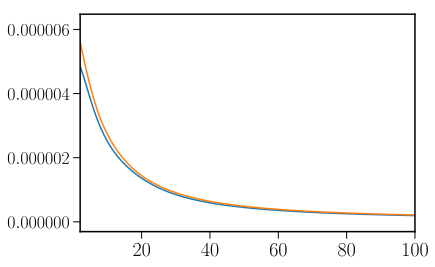

In [191]:
plt.plot(clkg)
plt.plot(clkg_2mpz)
plt.xlim(2,100)

In [192]:
GetErrDg(clkg[:lmax-lmin+1], clgg[:lmax-lmin+1], clkg_z0[:lmax-lmin+1], clgg_z0[:lmax-lmin+1], sigma_kg, sigma_gg)

0.21695266846993225

In [194]:
.62/.42

1.4761904761904763

In [195]:
0.21695266846993225 /1.45

0.14962252997926362

In [196]:
GetErrDg(clkg_2mpz[:lmax-lmin+1], clgg_2mpz[:lmax-lmin+1], clkg_z0_2mpz[:lmax-lmin+1], clgg_z0_2mpz[:lmax-lmin+1], sigma_kg, sigma_gg)

0.20060047256790303